In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 8,6

df_loan = pd.read_csv("\\Users\\PoonamYadav\\Downloads\\lending-club-loan-data\\sample_loan.csv",low_memory=False)
print(df_loan.shape)
print(df_loan.loan_status.value_counts())

#plot map
plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df_loan)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count Chart", fontsize=20)


plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()



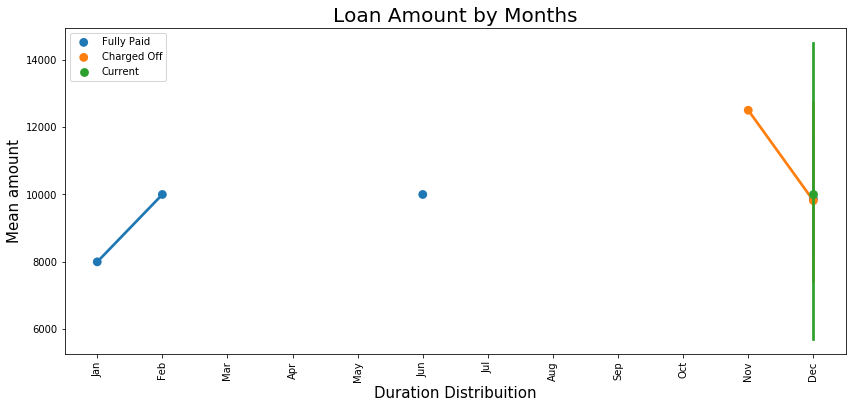

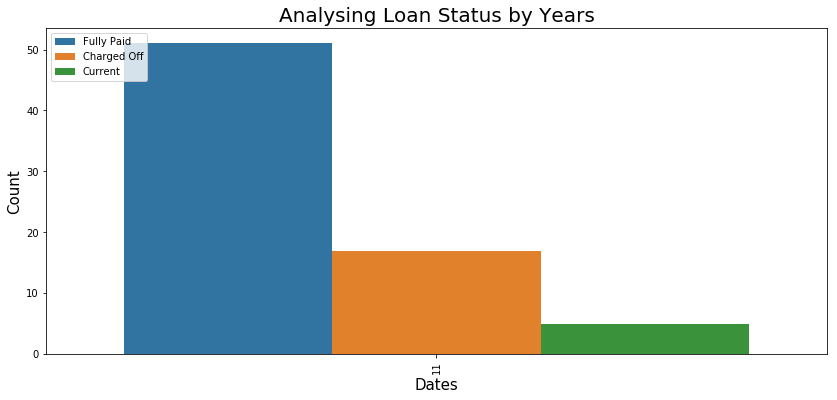

In [27]:
#Going depth in the default exploration to see the amount and counting though the ISSUE_D ,
#that is: The month which the loan was funded
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

df_loan['issue_month'], df_loan['issue_year'] = df_loan['issue_d'].str.split('-', 1).str
df_loan['issue_month'] = pd.Categorical(df_loan['issue_month'],categories=months_order, ordered=True)

#Issue_d x loan_amount
plt.figure(figsize = (14,6))

g = sns.pointplot(x='issue_month', y='loan_amnt', 
                  data=df_loan, 
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

#analysis by year
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=df_loan,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

Purposes count description: 
application_type    INDIVIDUAL
purpose                       
car                          3
credit_card                 14
debt_consolidation          37
home_improvement             1
major_purchase               2
medical                      1
moving                       1
other                        8
small_business               5
wedding                      1


Text(0,0.5,'Loan Amount')

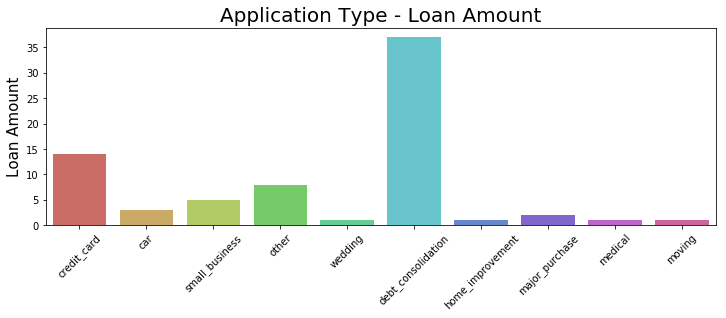

In [29]:
#For what purpose, what type of application, loan was taken
print("Purposes count description: ")
print(pd.crosstab(df_loan.purpose, df_loan.application_type))
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.countplot(x="purpose",data=df_loan,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

In [58]:
#Summary of average loan amount for Each Loan Purpose
import numpy as np
group_by_purpose = df_loan.groupby(['purpose'])
print(group_by_purpose)
avg_loan_amnt  = group_by_purpose.apply(lambda x: x['loan_amnt'].mean())
avg_loan_amnt

purpose
car                    5833.333333
credit_card           12176.785714
debt_consolidation    10504.054054
home_improvement      10000.000000
major_purchase         4800.000000
medical                6000.000000
moving                10800.000000
other                  6996.875000
small_business         9540.000000
wedding                5000.000000
dtype: float64

In [56]:
#Statistical Summary for Each Sate on Interest Rates
group_by_state = df_loan.groupby(['addr_state'])
group_by_state
#max_interest_state  = group_by_state.apply(lambda x: x['int_rate'].max())
#max_interest_state
#min_interest_state  = group_by_state.apply(lambda x: x['int_rate'].min())
#min_interest_state
group_by_state['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
addr_state,,,,,,,,
AL,1.0,13.490000,NaN,13.49,13.4900,13.490,13.4900,13.49
AZ,4.0,11.405000,2.852794,7.90,9.9625,11.535,12.9775,14.65
CA,18.0,14.080556,4.109035,6.03,10.9150,13.880,16.5675,21.28
CT,3.0,6.226667,0.340637,6.03,6.0300,6.030,6.3250,6.62
FL,4.0,13.685000,1.967037,11.71,12.2425,13.535,14.9775,15.96
GA,2.0,16.425000,1.633417,15.27,15.8475,16.425,17.0025,17.58
IL,5.0,11.676000,2.680351,9.91,9.9100,9.910,12.6900,15.96
KY,1.0,10.650000,NaN,10.65,10.6500,10.650,10.6500,10.65
LA,1.0,6.030000,NaN,6.03,6.0300,6.030,6.0300,6.03
